# Analyzing Time Series Data
## Contents
* 1) Importing your libraries and data
* 2) Time-series analysis: decomposition
* 3) Testing for stationarity

## 1\) Importing your libraries and data

In [31]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight') 

In [2]:
path = '/Users/calebhill/Project 6'

In [3]:
file = 'car_sales_data.csv'

In [4]:
data = pd.read_csv(os.path.join(path, 'data', 'prepared data', file))

In [5]:
data.shape

(2500000, 9)

In [6]:
data.head(5)

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


Nissan F-150 ? 

In [7]:
df = data.groupby(data['Date'],as_index=False)['Sale Price'].sum()

I chose to use just the sales price variable because it is the most relevant to the dataset I've been working with.

In [8]:
df.shape

(366, 2)

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.columns

Index(['Date', 'Sale Price'], dtype='object')

In [12]:
df.set_index('Date', inplace = True)

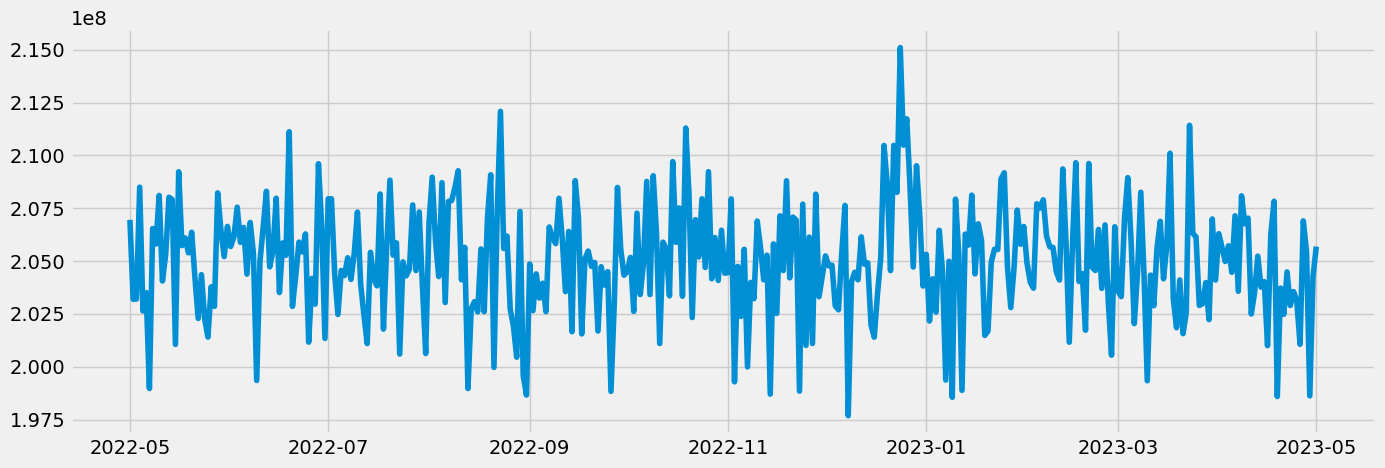

In [13]:
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(df)

In [14]:
df.head(30)

,Sale Price
Date,
2022-05-01,206949043
2022-05-02,203189741
2022-05-03,203205280
2022-05-04,208495677
2022-05-05,202638034
2022-05-06,203510976
2022-05-07,198970393
2022-05-08,206540891
2022-05-09,205804876


In [15]:
df.isnull().sum() 

Sale Price    0
dtype: int64

In [17]:
dups = df.duplicated()
dups.sum()

0

## 2) Time-series analysis: decomposition

In [19]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive')

In [20]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

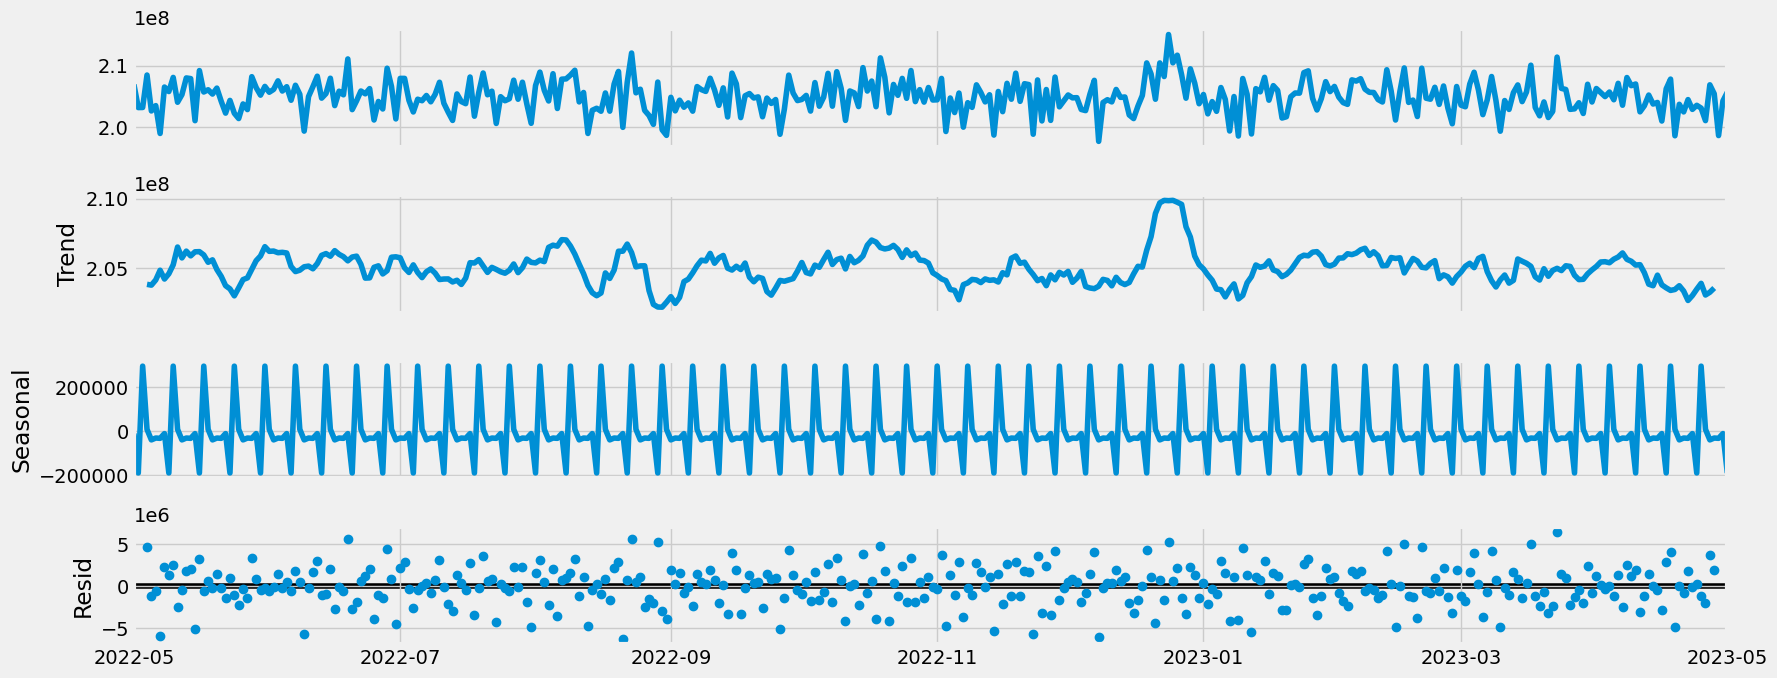

In [21]:
decomposition.plot()
plt.show()

The trend and the level are different so the data needs to be smoothed. The trend doesn't seem to be moving up or down so the data is most likely stationary. The noise looks to be all over the place and I'm not sure how best to interpret it.

## 3) Testing for stationarity

In [22]:
from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df['Sale Price'])

Dickey-Fuller Stationarity test:
Test Statistic                -5.766409e+00
p-value                        5.519557e-07
Number of Lags Used            1.300000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64


I can see that the test statistic is smaller than the critical values so I can disprove the null hypothesis and conclude that the data is stationary.

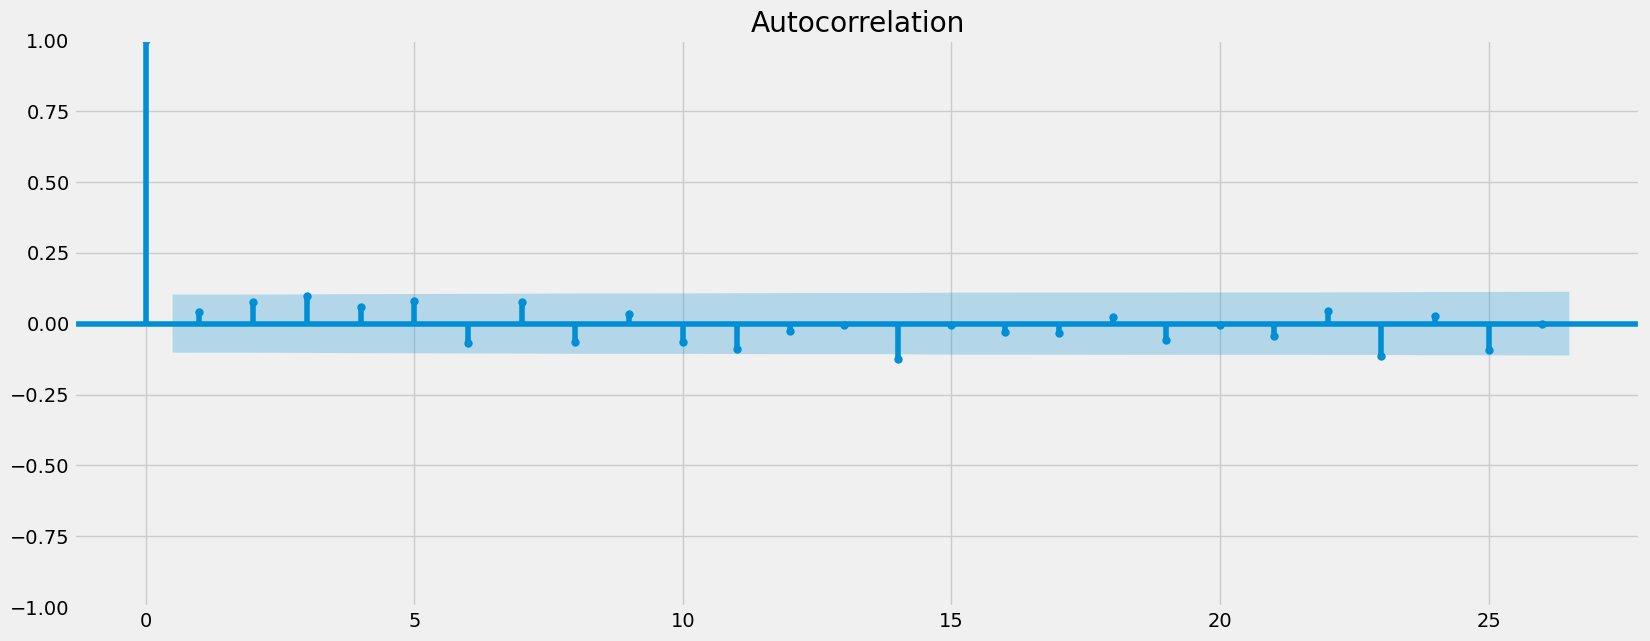

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df)
plt.show()